In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import skfda
from skfda.ml.regression import KNeighborsRegressor
from skfda.representation.basis import FourierBasis
from skfda import FDataGrid

In [42]:
df = pd.read_csv("sf_weather_2015_2025.csv")
df.head()

df['Date'] = pd.to_datetime(df['Date'])
days = (df['Date'] - df['Date'].min()).dt.days.to_numpy()

# Extract function values (temperature + precipitation)
data_matrix = df[['Temperature_F', 'Precipitation_in']].to_numpy() 
data_matrix = data_matrix[np.newaxis, :, :]

# Create FDataGrid
fd = FDataGrid(
    data_matrix=data_matrix,
    grid_points=days,
    dataset_name="San Francisco Weather (Synthetic)",
    argument_names=["Days since 2015-10-09"],
    coordinate_names=["temperature", "precipitation", ]
)
X, y = fd.coordinates

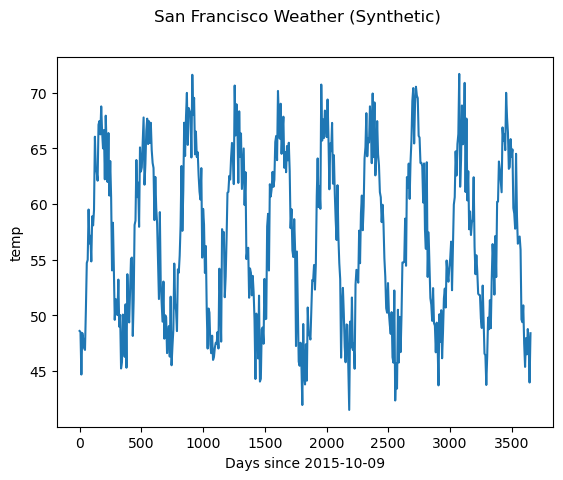

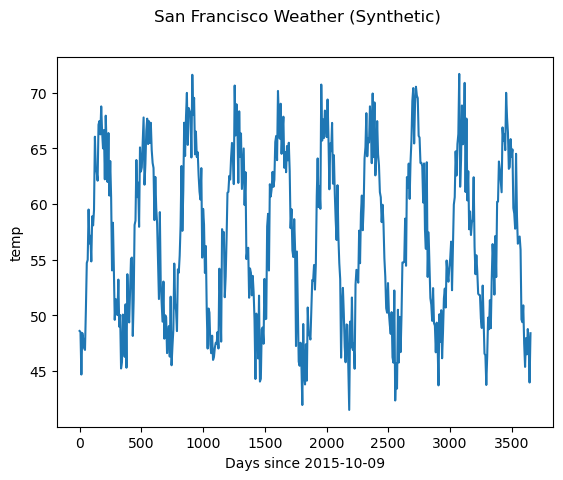

In [36]:
X.plot()

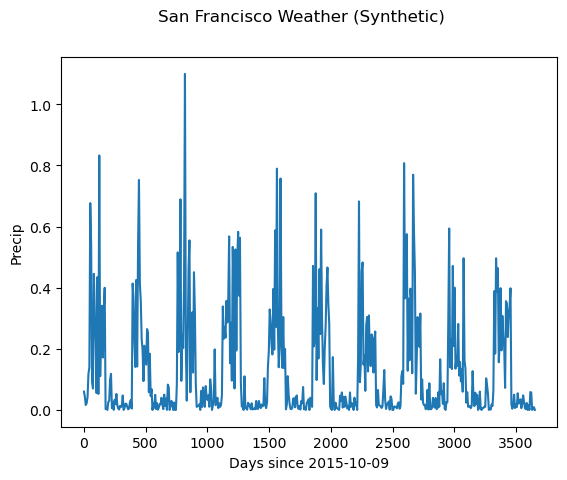

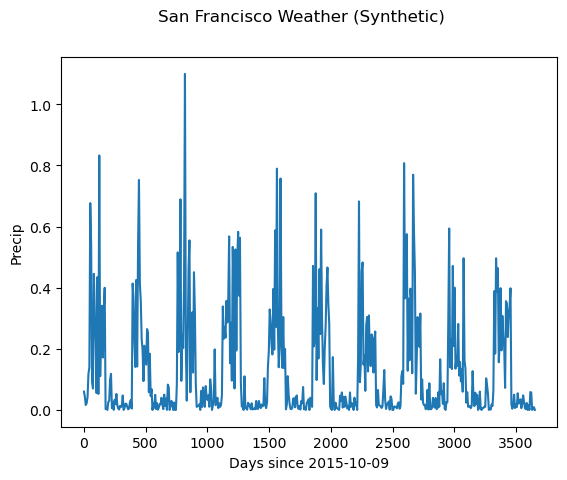

In [37]:
y.plot()

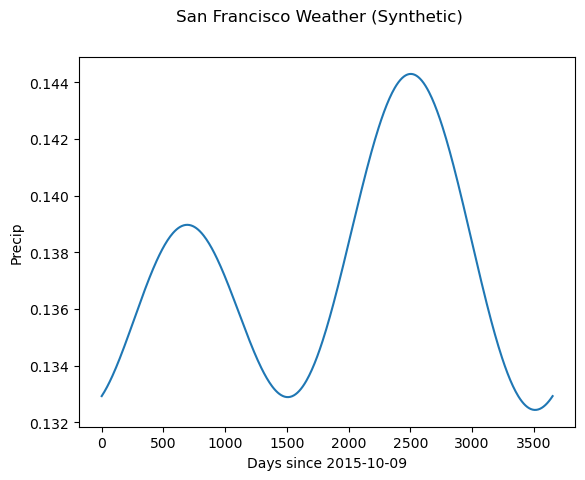

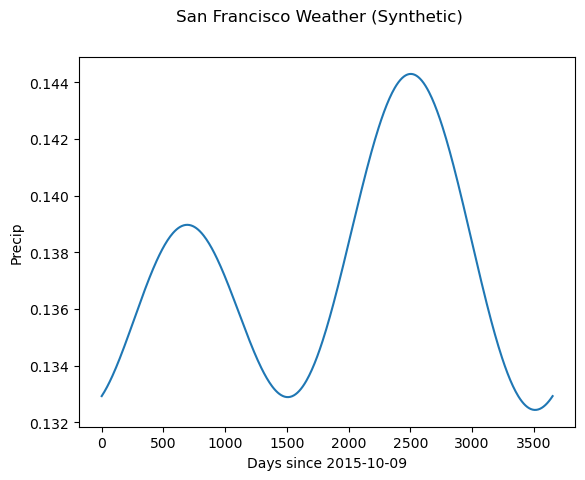

In [38]:
y = y.to_basis(FourierBasis(n_basis=5))

y.plot()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=5,
)

ValueError: With n_samples=1, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [40]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [41]:
y_pred = knn.predict(X_test)

# Plot prediction
fig = y_pred.plot()
fig.axes[0].set_prop_cycle(None)  # Reset colors
y_test.plot(fig=fig, linestyle='--')

NameError: name 'X_test' is not defined